Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import functions
from gradient_solver import GradientDescentSolver

BETAS = [0.01, 0.025, 0.05, 0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.000001]
RANDOM_ITERATIONS = 50
# ([1.0125586528493125, -1.4123706145514183], array([ 2., -3.])

found minimum: [-1.41237011] in 74
found minimum: [-1.41237108] in 72
found minimum: [-1.41237011] in 89
found minimum: [1.01255971] in 149
found minimum: [1.01255975] in 147
found minimum: [1.01255976] in 141
found minimum: [-1.41237114] in 73
found minimum: [-1.41237115] in 80
found minimum: [-1.41237114] in 71
found minimum: [-1.41237108] in 80
found minimum: [-1.4123701] in 91
found minimum: [1.01255974] in 147
found minimum: [1.01255976] in 136
found minimum: [-1.41237014] in 84
found minimum: [-1.41237109] in 81
found minimum: [-1.41237013] in 86
found minimum: [-1.41237013] in 112
found minimum: [1.01255971] in 149
found minimum: [-1.41237013] in 118
found minimum: [-1.41237111] in 80
found minimum: [-1.41237012] in 79
found minimum: [1.01255971] in 149
found minimum: [1.01255756] in 146
found minimum: [-1.41237009] in 100
found minimum: [1.01255756] in 170
found minimum: [1.01255977] in 148
found minimum: [1.01255969] in 141
found minimum: [-1.41237114] in 76
found minimum: [-1

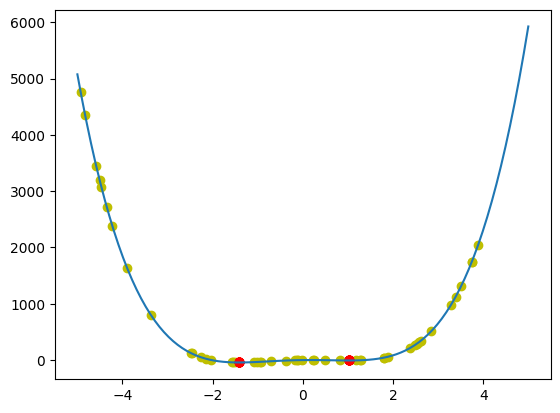

In [2]:
import random

x_min = -5
x_max = 5
plot = True

x = np.linspace(x_min, x_max, 100)
plt.plot(x, functions.f1([x]))

def solve_random_f1(iters: int = 50, beta: float = 0.001, plot: bool = True):
    values = []
    iter_nums = []
    for i in range(iters):
        x_rand = np.array([random.uniform(x_min, x_max)])

        solver = GradientDescentSolver(beta)
        found_min, i = solver.solve(x_rand, functions.grad_f1)
        if not np.isnan(found_min):
            values.append(found_min)
            iter_nums.append(i)

        if plot == True:
            plt.scatter(x_rand, functions.f1(x_rand), c='y', marker='o', alpha=1)
            print(f'found minimum: {found_min} in {i}')
            plt.scatter(found_min, functions.f1(found_min), c='r', marker='o', alpha=1)
    return values, iter_nums

_, _ = solve_random_f1()

plt.show()

In [3]:

statistics = []
for beta in BETAS:
    values, iter_nums = solve_random_f1(RANDOM_ITERATIONS, beta, False)
    errors = RANDOM_ITERATIONS - len(values)
    beta_stats = {'beta': beta,
                    'mean': np.mean(values),
                    'std_dev': np.mean(values),
                    'best_solution_val': np.min(values),
                    'mean_iter': np.mean(iter_nums),
                    'num_of_errors': errors
                    }
    statistics.append(beta_stats)

c:\Users\user\Desktop\wsi\lab1\src\functions.py:13: RuntimeWarning: overflow encountered in scalar power
  return np.array([40*x**3 + 9*x**2 - 60*x + 10])
c:\Users\user\Desktop\wsi\lab1\src\functions.py:13: RuntimeWarning: invalid value encountered in scalar add
  return np.array([40*x**3 + 9*x**2 - 60*x + 10])
c:\Users\user\Desktop\wsi\lab1\src\functions.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([40*x**3 + 9*x**2 - 60*x + 10])
c:\Program Files\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Program Files\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
# print(statistics)

for i in len(statistics):
    plt.scatter(BETAS[i], statistics['best_solution'])

found minimum: [ 2.12618801 -3.32986574] in 10001
found minimum: [ 1.647263   -3.01908454] in 10001
found minimum: [ 2.3298531  -2.87347696] in 10001
found minimum: [ 2.03143808 -2.64818344] in 10001
found minimum: [ 2.23879897 -3.26023064] in 10001
found minimum: [ 2.15020154 -3.31965845] in 10001
found minimum: [ 1.74707908 -2.75358741] in 10001
found minimum: [ 2.28729489 -2.79440787] in 10001
found minimum: [ 2.09411174 -2.65952891] in 10001
found minimum: [ 2.34928318 -2.94725919] in 10001
found minimum: [ 1.98329693 -2.64720614] in 10001
found minimum: [ 2.07085851 -3.34597176] in 10001
found minimum: [ 2.21840398 -2.72284769] in 10001
found minimum: [ 1.78836916 -2.71769662] in 10001
found minimum: [ 1.75273634 -3.25235127] in 10001
found minimum: [ 1.77701258 -3.27382552] in 10001
found minimum: [ 2.11128419 -2.66471837] in 10001
found minimum: [ 2.35030851 -2.95458979] in 10001
found minimum: [ 2.35226668 -3.02672964] in 10001
found minimum: [ 2.17874093 -2.69545831] in 10001


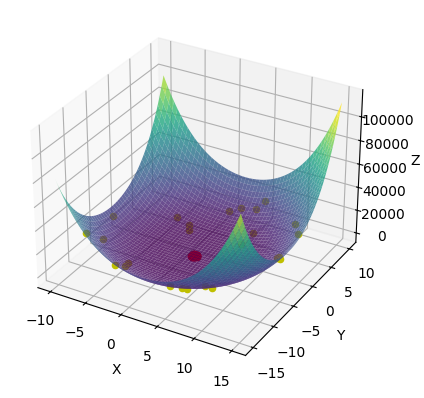

In [ ]:
x_min, x_max = -10, 15
y_min, y_max = -15, 10

x = np.linspace(x_min, x_max, 1000)
y = np.linspace(y_min, y_max, 1000)
xx, yy = np.meshgrid(x, y)
zz = functions.f2([xx, yy])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.8)

for i in range(25):
    x_rand = np.array([random.uniform(x_min, x_max), random.uniform(y_min, y_max)])
    ax.scatter(x_rand[0], x_rand[1], functions.f2(x_rand), c='y', marker='o', alpha=1)

    solver = GradientDescentSolver()
    found_min, i = solver.solve(x_rand, functions.grad_f2)
    print(f'found minimum: {found_min} in {i}')
    ax.scatter(found_min[0], found_min[1], functions.f2(found_min), c='r', marker='o',alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()